In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# from tensorflow.python.client import device_lib

# print(device_lib.list_local_devices())

In [3]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import SGD

In [4]:
# pip install --upgrade tensorflow==2.11.0

In [5]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [6]:
Images, Labels = get_images('/content/drive/MyDrive/Colab Notebooks/dna/week1/archive/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [7]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


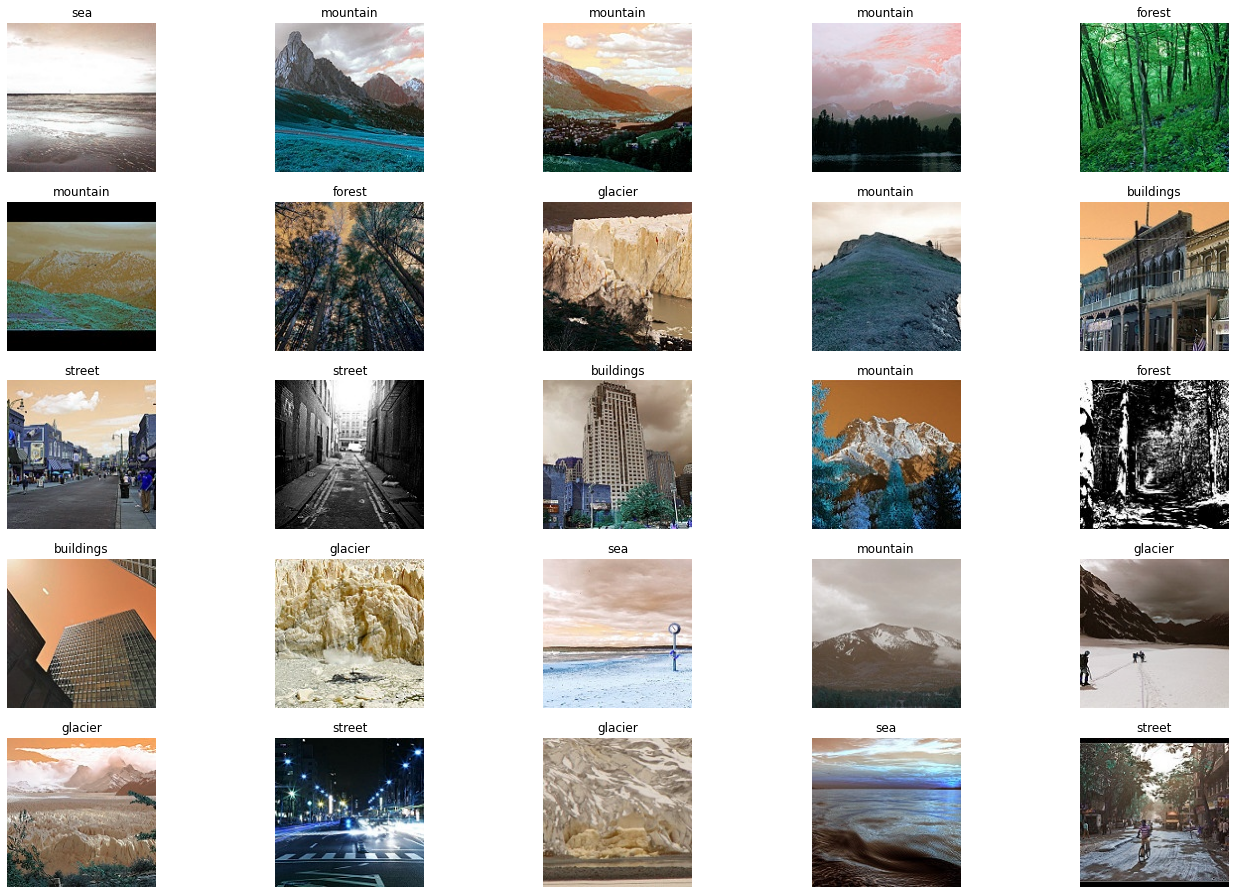

In [8]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [17]:
# model = Models.Sequential()
                                                                         
# model.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))                                                          #가충기 초기화 
# model.add(BatchNormalization())
# model.add(Layers.MaxPool2D(2,2)) ##폴링은 뭔가 작을수록 좋은듯?

# model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same',strides=1))
# model.add(BatchNormalization())
# model.add(Layers.MaxPool2D(2,2))

# model.add(Layers.Conv2D(128,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
# model.add(BatchNormalization())
# model.add(Layers.MaxPool2D(2,2))

# model.add(Layers.Conv2D(256,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
# model.add(BatchNormalization())
# model.add(Layers.MaxPool2D(2,2))

# model.add(Layers.Conv2D(512,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
# model.add(BatchNormalization())
# model.add(Layers.MaxPool2D(2,2))

# model.add(Layers.Conv2D(1024,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
# model.add(BatchNormalization())
# model.add(Layers.MaxPool2D(2,2))







# model.add(Layers.Flatten())
# model.add(Layers.Dense(50,activation='relu'))
# model.add(Layers.Dropout(rate=0.4))
# model.add(Layers.Dense(50,activation='softmax'))
# # model.add(Layers.Dropout(rate=0.5))
# # model.add(Layers.Dense(50,activation='softmax'))



# model.compile(optimizer=Optimizer.Adam(lr=0.0000005),loss='sparse_categorical_crossentropy',metrics=['accuracy'])#학습률은 이게맞는듯
# model.summary()
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# # Utils.plot_model(model,to_file='model.png',show_shapes=True)


# # 특징 추출(Feature Extraction) : 컨벌루전레이어 + 풀링레이어 #분류기(classfier) : dense drop dense

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_65 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 74, 74, 64)        18496     
                                                                 
 batch_normalization_66 (Bat  (None, 74, 74, 64)       256       
 chNormalization)                                                
                                                     

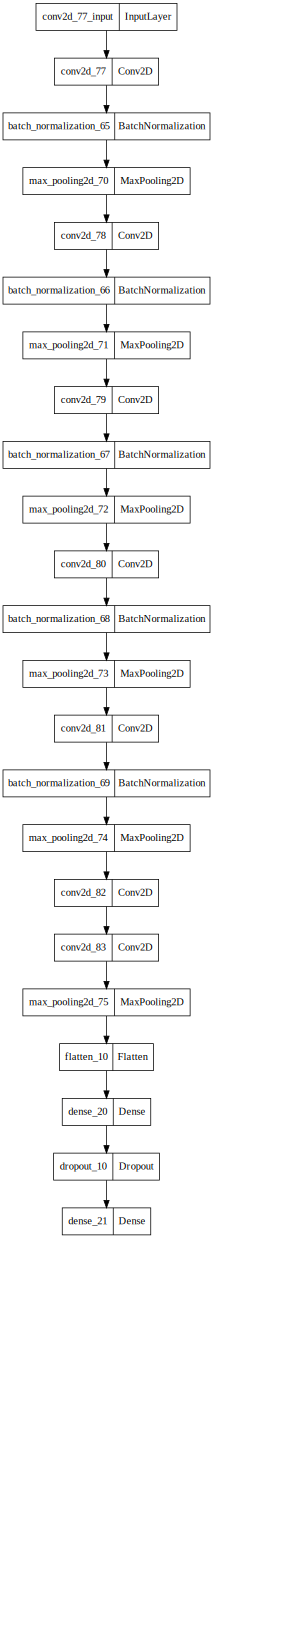

In [32]:
model = Models.Sequential()
                                                                         
model.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))                                                          #가충기 초기화 
model.add(BatchNormalization())
model.add(Layers.MaxPool2D(2,2)) ##폴링은 뭔가 작을수록 좋은듯?

model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(Layers.MaxPool2D(2,2))

model.add(Layers.Conv2D(128,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(Layers.MaxPool2D(2,2))

model.add(Layers.Conv2D(256,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(Layers.MaxPool2D(2,2))

model.add(Layers.Conv2D(512,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(Layers.MaxPool2D(2,2))


model.add(Layers.Conv2D(512,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
model.add(Layers.Conv2D(512,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
model.add(Layers.MaxPool2D(2,2))
##전이학습층

model.add(Layers.Flatten())
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.4))
model.add(Layers.Dense(50,activation='softmax'))
# model.add(Layers.Dropout(rate=0.5))
# model.add(Layers.Dense(50,activation='softmax'))



model.compile(optimizer=Optimizer.Adam(lr=0.0000005),loss='sparse_categorical_crossentropy',metrics=['accuracy'])#학습률은 이게맞는듯
model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
# Utils.plot_model(model,to_file='model.png',show_shapes=True)


# 특징 추출(Feature Extraction) : 컨벌루전레이어 + 풀링레이어 #분류기(classfier) : dense drop dense

In [25]:
trained = model.fit(Images,Labels,epochs=100,validation_split=0.10)

Epoch 1/100
395/395 [==============================] - 21s 49ms/step - loss: 4.3207 - accuracy: 0.0880 - val_loss: 3.0671 - val_accuracy: 0.2058
Epoch 2/100
395/395 [==============================] - 18s 46ms/step - loss: 3.2112 - accuracy: 0.1796 - val_loss: 2.6596 - val_accuracy: 0.3305
Epoch 3/100
395/395 [==============================] - 18s 46ms/step - loss: 2.8993 - accuracy: 0.2487 - val_loss: 2.3820 - val_accuracy: 0.4131
Epoch 4/100
395/395 [==============================] - 19s 48ms/step - loss: 2.6379 - accuracy: 0.2966 - val_loss: 2.0191 - val_accuracy: 0.4729
Epoch 5/100
395/395 [==============================] - 18s 47ms/step - loss: 2.3938 - accuracy: 0.3278 - val_loss: 1.7955 - val_accuracy: 0.5014
Epoch 6/100
395/395 [==============================] - 18s 47ms/step - loss: 2.2745 - accuracy: 0.3504 - val_loss: 1.6860 - val_accuracy: 0.5171
Epoch 7/100
395/395 [==============================] - 19s 47ms/step - loss: 2.1962 - accuracy: 0.3717 - val_loss: 1.6093 - val_ac

KeyboardInterrupt: ignored

In [ ]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:
test_images,test_labels = get_images('/content/drive/MyDrive/Colab Notebooks/dna/week1/archive/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

In [ ]:
pred_images,no_labels = get_images('/content/drive/MyDrive/Colab Notebooks/dna/week1/archive/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

In [ ]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(np.argmax(model.predict(pred_image), axis=-1)[0])

   
    
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])

            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

In [ ]:
# https://zeuskwon-ds.tistory.com/49#recentEntries